In [497]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, accuracy_score
import seaborn as sns
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier


In [541]:
#load the dataset
global_phonee_addiction_data = pd.read_csv(r"C:\Users\Wahaj Sajid\Desktop\Datasets\mobile_addiction_data.csv")

# Training the model with maximum features

In [554]:
global_phonee_addiction_data.head()

,Age,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Physical_Activity_Hours,Mental_Health_Score,Depression_Score,Anxiety_Score,Stress_Level,Time_Spent_With_Family_Hours,Online_Shopping_Hours,Has_Screen_Time_Management_App,Self_Reported_Addiction_Level,Monthly_Data_Usage_GB,Age_First_Phone,Push_Notifications_Per_Day,Tech_Savviness_Score,Education_Level_Bachelor's,Education_Level_High School,Education_Level_Master's,Education_Level_PhD,Internet_Connection_Type_3G,Internet_Connection_Type_4G,Internet_Connection_Type_5G,Internet_Connection_Type_WiFi,Gender_Female,Gender_Male,Gender_Other
0,0.344828,0.450156,0.408840,0.166337,0.318930,0.648649,0.467320,0.405714,0.320905,0.471429,0.614884,0.809300,0.237124,0.959135,0.376106,0.711538,0,1,0.298521,0.666667,0.519608,0.393776,0,1,0,0,0,0,1,0,0,1,0
1,0.241379,0.702492,0.331492,0.619802,0.514403,0.154440,0.787582,0.272381,0.455393,0.235714,0.961388,0.991582,0.397140,0.250300,0.199115,0.253846,1,3,0.598685,0.333333,0.544118,0.094466,0,0,1,0,0,1,0,0,0,1,0
2,1.000000,0.446262,0.314917,0.419802,0.403292,0.355212,0.643791,0.363810,0.500666,0.689286,0.737021,0.446939,0.944694,0.996595,0.373894,0.053846,1,3,0.499726,0.833333,0.441176,0.502952,0,1,0,0,0,0,0,1,0,0,1
3,0.551724,0.520249,0.436464,0.316832,0.555556,0.366795,0.790850,0.344762,0.593875,0.335714,0.534360,0.108728,0.050205,0.665565,0.245575,0.065385,1,2,0.561804,0.750000,0.294118,0.308316,0,1,0,0,1,0,0,0,1,0,0
4,0.586207,0.489097,0.745856,0.299010,0.355967,0.285714,0.421569,0.333333,0.348868,0.371429,0.670301,0.375789,0.172817,0.147035,0.234513,0.223077,0,0,0.188059,0.833333,0.622549,0.217052,0,1,0,0,1,0,0,0,0,0,1


In [543]:
global_phonee_addiction_data = global_phonee_addiction_data.drop(columns=['User_ID', 'Country', 'Occupation','Income_USD','Relationship_Status','Has_Children','Urban_or_Rural','Primary_Device_Brand','Has_Night_Mode_On'])

In [341]:
global_phonee_addiction_data.shape

(3000, 25)

In [544]:
global_phonee_addiction_data.isnull().sum()

Age                                 0
Gender                              0
Education_Level                   612
Daily_Screen_Time_Hours             0
Phone_Unlocks_Per_Day               0
Social_Media_Usage_Hours            0
Gaming_Usage_Hours                  0
Streaming_Usage_Hours               0
Messaging_Usage_Hours               0
Work_Related_Usage_Hours            0
Sleep_Hours                         0
Physical_Activity_Hours             0
Mental_Health_Score                 0
Depression_Score                    0
Anxiety_Score                       0
Stress_Level                        0
Time_Spent_With_Family_Hours        0
Online_Shopping_Hours               0
Internet_Connection_Type            0
Has_Screen_Time_Management_App      0
Self_Reported_Addiction_Level       0
Monthly_Data_Usage_GB               0
Age_First_Phone                     0
Push_Notifications_Per_Day          0
Tech_Savviness_Score                0
dtype: int64

In [545]:
global_phonee_addiction_data['Education_Level'] = global_phonee_addiction_data['Education_Level'].fillna(global_phonee_addiction_data['Education_Level'].mode()[0])

In [546]:
global_phonee_addiction_data = pd.get_dummies(global_phonee_addiction_data, columns=['Education_Level','Internet_Connection_Type', 'Gender'])

In [553]:
#encode the categorical data 
encoder =  LabelEncoder()

non_numeric_columns = global_phonee_addiction_data.select_dtypes(exclude='number')


for column in non_numeric_columns.columns:
    global_phonee_addiction_data[column] = encoder.fit_transform(global_phonee_addiction_data[[column]])
    

c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Wahaj Sajid\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [550]:
#check for the negative values

numeric_data = global_phonee_addiction_data.select_dtypes(exclude=['object', 'bool'])

for column in numeric_data.columns:
    print(column, len(global_phonee_addiction_data[column][global_phonee_addiction_data[column] < 0]))

Age 0
Daily_Screen_Time_Hours 0
Phone_Unlocks_Per_Day 0
Social_Media_Usage_Hours 0
Gaming_Usage_Hours 0
Streaming_Usage_Hours 0
Messaging_Usage_Hours 0
Work_Related_Usage_Hours 0
Sleep_Hours 0
Physical_Activity_Hours 0
Mental_Health_Score 0
Depression_Score 0
Anxiety_Score 0
Stress_Level 0
Time_Spent_With_Family_Hours 0
Online_Shopping_Hours 0
Monthly_Data_Usage_GB 0
Age_First_Phone 0
Push_Notifications_Per_Day 0
Tech_Savviness_Score 0


In [549]:
#convert the negative values to positive values
numeric_data1 = global_phonee_addiction_data.select_dtypes(exclude=['object', 'bool'])

global_phonee_addiction_data[numeric_data1.columns] = global_phonee_addiction_data[numeric_data1.columns].abs()

In [551]:
#scale the data
scaler = MinMaxScaler()

numeric_columns = global_phonee_addiction_data.select_dtypes(exclude=['object', 'bool'])



for column in numeric_columns.columns:
     global_phonee_addiction_data[column] = scaler.fit_transform(global_phonee_addiction_data[[column]])

In [555]:
#defining x and y
x = global_phonee_addiction_data.drop(columns=['Self_Reported_Addiction_Level'], axis=1)
y = global_phonee_addiction_data['Self_Reported_Addiction_Level']

In [556]:
#tain test split the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [562]:
print(f"train: ",np.unique(y_train, return_counts=True))
print(f"test",np.unique(y_test, return_counts=True))

train:  (array([0, 1, 2, 3]), array([611, 605, 584, 600], dtype=int64))
test (array([0, 1, 2, 3]), array([153, 151, 146, 150], dtype=int64))


In [558]:
#train the neural network
model = Sequential([
    Dense(units=64, activation='relu'),  
    Dense(units=32, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=4, activation='softmax')
])
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2739 - loss: 1.3875 - val_accuracy: 0.2438 - val_loss: 1.3907
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2628 - loss: 1.3836 - val_accuracy: 0.2354 - val_loss: 1.3901
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.3763 - val_accuracy: 0.2667 - val_loss: 1.3932
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3035 - loss: 1.3725 - val_accuracy: 0.2583 - val_loss: 1.3920
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.3701 - val_accuracy: 0.2542 - val_loss: 1.3956
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3236 - loss: 1.3612 - val_accuracy: 0.2688 - val_loss: 1.3995
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3186 - loss: 1.3556 - val_accuracy: 0.2688 - val_loss: 1.3991
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3519 - loss: 1.3460 - val_accuracy: 0.2521 - v

In [564]:
#training data evaluation 
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: ', train_loss)
print(f'Train Accuracy: ', train_accuracy)
#testing data evaluation 
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: ', test_loss)
print(f'Test Accuracy: ', test_accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8367 - loss: 0.5045
Train Loss:  1.0359224081039429
Train Accuracy:  0.7283333539962769
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2700 - loss: 3.3227 
Test Loss:  3.3305163383483887
Test Accuracy:  0.2566666603088379


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[470  67  46  28]
 [ 36 507  30  32]
 [ 80  82 376  46]
 [ 50 107  48 395]]


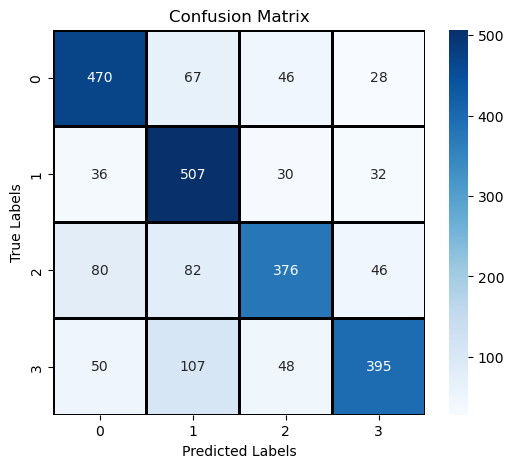

In [572]:
#train data prediction
train_predict = model.predict(x_train)
train_cm = confusion_matrix(y_train, train_predict.argmax(axis=1))
print(train_cm)

plt.figure(figsize=(6, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[37 49 32 35]
 [36 53 33 29]
 [31 55 28 32]
 [32 50 32 36]]


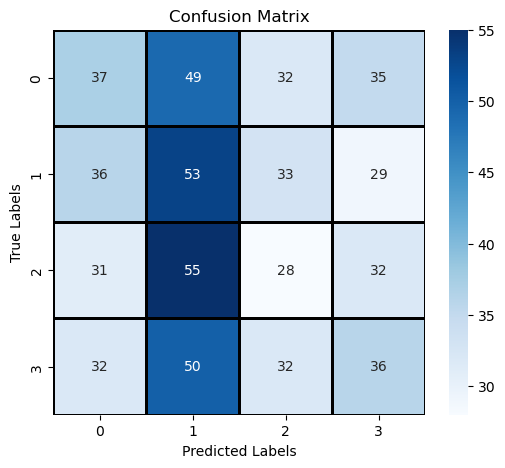

In [573]:
#test data prediction
test_predict = model.predict(x_test)
test_cm = confusion_matrix(y_test, test_predict.argmax(axis = 1))
print(test_cm)


plt.figure(figsize=(6, 5))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Training the model on minimum features

In [ ]:
data = global_phonee_addiction_data[['Age', 'Gender', 'Daily_Screen_Time_Hours', 'Phone_Unlocks_Per_Day', 'Social_Media_Usage_Hours', 'Gaming_Usage_Hours', 'Streaming_Usage_Hours', 'Messaging_Usage_Hours', 'Work_Related_Usage_Hours','Sleep_Hours', 'Physical_Activity_Hours', 'Self_Reported_Addiction_Level', 'Mental_Health_Score', 'Depression_Score', 'Anxiety_Score', 'Stress_Level', 'Has_Screen_Time_Management_App']].copy()

In [308]:
data.head()

,Age,Gender,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Physical_Activity_Hours,Self_Reported_Addiction_Level,Mental_Health_Score,Depression_Score,Anxiety_Score,Stress_Level
0,32,Male,5.81,75,0.84,-1.55,3.36,1.44,2.14,5.22,1.32,Low,61.47,80.80,23.72,95.80
1,26,Male,9.05,61,3.13,2.50,0.80,2.42,1.44,6.23,0.66,Severe,96.11,98.99,39.72,25.03
2,70,Other,5.76,58,2.12,1.96,1.84,1.98,1.92,6.57,1.93,Severe,73.68,44.64,94.47,99.54
3,44,Female,6.71,80,1.60,2.70,1.90,2.43,1.82,7.27,0.94,Moderate,53.42,10.89,5.03,66.49
4,46,Other,6.31,136,1.51,1.73,1.48,1.30,1.76,5.43,1.04,High,67.01,37.54,17.29,14.72


In [309]:
#encode the categorical data
gender_encoder = LabelEncoder()
addiction_level_encoder = LabelEncoder()
data['Gender'] = gender_encoder.fit_transform(data['Gender'])
data['Self_Reported_Addiction_Level'] = addiction_level_encoder.fit_transform(data['Self_Reported_Addiction_Level'])

In [310]:
#checking for the negative values in the columns because hours cannot be in the negative. 
for column in data.columns:
    print(column, len(data[column][data[column]<0]))

Age 0
Gender 0
Daily_Screen_Time_Hours 9
Phone_Unlocks_Per_Day 1
Social_Media_Usage_Hours 70
Gaming_Usage_Hours 213
Streaming_Usage_Hours 67
Messaging_Usage_Hours 2
Work_Related_Usage_Hours 53
Sleep_Hours 0
Physical_Activity_Hours 80
Self_Reported_Addiction_Level 0
Mental_Health_Score 0
Depression_Score 0
Anxiety_Score 0
Stress_Level 0


In [311]:
#convert the negative values to postive values
data[data.columns] = data[data.columns].abs()

In [312]:
print(data.isnull().sum())

Age                              0
Gender                           0
Daily_Screen_Time_Hours          0
Phone_Unlocks_Per_Day            0
Social_Media_Usage_Hours         0
Gaming_Usage_Hours               0
Streaming_Usage_Hours            0
Messaging_Usage_Hours            0
Work_Related_Usage_Hours         0
Sleep_Hours                      0
Physical_Activity_Hours          0
Self_Reported_Addiction_Level    0
Mental_Health_Score              0
Depression_Score                 0
Anxiety_Score                    0
Stress_Level                     0
dtype: int64


In [201]:
#visualize each column
# for column in data.columns:
#     if(column == "Gender" or column == "Self_Reported_Addiction_Level"):
#         continue
#     else:
#         print(data[column].skew())
#         plt.figure(figsize=(6,4))
#         sns.histplot(data[column], kde = True, bins = 30)
#         plt.title(f"Distribution of {column}")
#         plt.xlabel(column)
#         plt.ylabel("frequency")
#         plt.show()
    

In [300]:
#Standardize the data using the Standard Scalar
x_scaler = StandardScaler()
for column in data.columns:
    if(column == "Gender" or column == "Self_Reported_Addiction_Level"):
        continue
    else:
        data[column] = x_scaler.fit_transform(data[[column]])

In [313]:
#check the data after some preprocessing 
data.head()

,Age,Gender,Daily_Screen_Time_Hours,Phone_Unlocks_Per_Day,Social_Media_Usage_Hours,Gaming_Usage_Hours,Streaming_Usage_Hours,Messaging_Usage_Hours,Work_Related_Usage_Hours,Sleep_Hours,Physical_Activity_Hours,Self_Reported_Addiction_Level,Mental_Health_Score,Depression_Score,Anxiety_Score,Stress_Level
0,32,1,5.81,75,0.84,1.55,3.36,1.44,2.14,5.22,1.32,1,61.47,80.80,23.72,95.80
1,26,1,9.05,61,3.13,2.50,0.80,2.42,1.44,6.23,0.66,3,96.11,98.99,39.72,25.03
2,70,2,5.76,58,2.12,1.96,1.84,1.98,1.92,6.57,1.93,3,73.68,44.64,94.47,99.54
3,44,0,6.71,80,1.60,2.70,1.90,2.43,1.82,7.27,0.94,2,53.42,10.89,5.03,66.49
4,46,2,6.31,136,1.51,1.73,1.48,1.30,1.76,5.43,1.04,0,67.01,37.54,17.29,14.72


In [314]:
#defining x and y
x = data.drop(columns=['Self_Reported_Addiction_Level'], axis=1)
y = data['Self_Reported_Addiction_Level']

In [315]:
#train test split the model
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=42)

In [316]:
# training the model
model = Sequential([
    Dense(units = 60, activation='relu'),
    Dense(units = 30, activation='relu'),
    Dense(units=4, activation='softmax')
])

model.compile(optimizer = 'adam', loss= SparseCategoricalCrossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2715 - loss: 7.3864 - val_accuracy: 0.2542 - val_loss: 2.1345
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2591 - loss: 1.9302 - val_accuracy: 0.2562 - val_loss: 1.7439
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2521 - loss: 1.7120 - val_accuracy: 0.2438 - val_loss: 1.7454
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2728 - loss: 1.5901 - val_accuracy: 0.2396 - val_loss: 1.6016
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2805 - loss: 1.5582 - val_accuracy: 0.2250 - val_loss: 1.7361
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2688 - loss: 1.5772 - val_accuracy: 0.2333 - val_loss: 1.6261
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2788 - loss: 1.5075 - val_accuracy: 0.2562 - val_loss: 1.5844
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3018 - loss: 1.4592 - val_accuracy: 0.2104 - v

In [305]:
#evaluating the model on training dataset
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"loss: ",train_loss)
print(f"accuracy: ",train_accuracy)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7791 - loss: 0.6784
loss:  0.9819880127906799
accuracy:  0.6745833158493042


In [306]:
#evaluating the model on testing dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"loss: ",test_loss)
print(f"accuracy: ",test_accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2653 - loss: 2.2767  
loss:  2.3197386264801025
accuracy:  0.2433333396911621
